In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df_main = pd.read_csv('Output.csv',index_col=0)

C:\Users\dsimo\AppData\Local\Temp\ipykernel_7972\1042410464.py:1: DtypeWarning: Columns (22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('Output.csv',index_col=0)


In [4]:
df_main

,Districts and neighbourhoods,Registered nuisance (number),year_x,latitude,longitude,cbs_grid_code,date,green_score,livability_score_x,neighborhood_name,...,Number of installations with registered solar panel companies (number),Renewable energy (%),Renewable electricity (%),"CO2 emissions Traffic and transport incl. motorways and roads, excl. electr. rail traffic (tonnes)",CO2 emissions companies and institutions (tonnes),"CO2 emissions from homes, temperature corrected (tonnes)",CO2 emissions total (tonnes),"Energy Consumption (including regenerative heat, solar power, motorways) (kwh)",Renewable electricity (kwh),Renewable energy (kwh)
0,Valkenberg,121,2018,51.591989,4.783465,E1131N4005,2018-09-01,22.833333,2.169150,Valkenberg,...,419.0,0.055,0.061,412754.0,376319.0,277797.0,1066900.0,4.204445e+06,48333.3372,231388.9074
1,Valkenberg,121,2018,51.591989,4.783465,E1131N4005,2018-09-01,22.833333,2.169150,Valkenberg,...,419.0,0.055,0.061,412754.0,376319.0,277797.0,1066900.0,4.204445e+06,48333.3372,231388.9074
2,Valkenberg,121,2018,51.591989,4.783465,E1131N4005,2018-09-01,22.833333,2.169150,Valkenberg,...,419.0,0.055,0.061,412754.0,376319.0,277797.0,1066900.0,4.204445e+06,48333.3372,231388.9074
3,Valkenberg,121,2018,51.591989,4.783465,E1131N4005,2018-09-01,22.833333,2.169150,Valkenberg,...,419.0,0.055,0.061,412754.0,376319.0,277797.0,1066900.0,4.204445e+06,48333.3372,231388.9074
4,Valkenberg,121,2018,51.591989,4.783465,E1131N4005,2018-09-01,22.833333,2.169150,Valkenberg,...,419.0,0.055,0.061,412754.0,376319.0,277797.0,1066900.0,4.204445e+06,48333.3372,231388.9074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169343,Teteringen,19,2015,51.605240,4.815914,E1154N4019,2015-07-01,20.166667,2.299769,Teteringen,...,191.0,0.043,0.026,396410.0,415772.0,305603.0,1117800.0,4.076945e+06,19444.4460,173888.9028
5169344,Teteringen,19,2015,51.605240,4.815914,E1154N4019,2015-07-01,20.166667,2.299769,Teteringen,...,191.0,0.043,0.026,396410.0,415772.0,305603.0,1117800.0,4.076945e+06,19444.4460,173888.9028
5169345,Teteringen,19,2015,51.605240,4.815914,E1154N4019,2015-07-01,20.166667,2.299769,Teteringen,...,191.0,0.043,0.026,396410.0,415772.0,305603.0,1117800.0,4.076945e+06,19444.4460,173888.9028
5169346,Teteringen,19,2015,51.605240,4.815914,E1154N4019,2015-07-01,20.166667,2.299769,Teteringen,...,191.0,0.043,0.026,396410.0,415772.0,305603.0,1117800.0,4.076945e+06,19444.4460,173888.9028


In [5]:
df_main.columns

Index(['Districts and neighbourhoods', 'Registered nuisance (number)',
       'year_x', 'latitude', 'longitude', 'cbs_grid_code', 'date',
       'green_score', 'livability_score_x', 'neighborhood_name', 'TotalHouses',
       'Population', 'Unnamed: 0', 'index', 'neighborhood', 'regions',
       'year_y', 'livability_score_y', 'income', 'population',
       'working_population', 'total_job_growth', 'Neighborhood',
       'Income Index', 'Average Green Score', 'Average Income', 'Year',
       'Electricity Consumption: total (kwh)', 'Natural Gas Consumption (m3)',
       'Energy Consumption (including regenerative heat, solar power, motorways) (TJ)',
       'Electricity consumption of all homes (kwh)',
       'Gas consumption all homes (m3)',
       'Electricity consumption companies and institutions (kwh)',
       'Gas consumption by companies and institutions (m3)',
       'Power of registered solar panels homes (kw peak)',
       'Power of registered solar panels companies (kw peak)',


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169348 entries, 0 to 5169347
Data columns (total 47 columns):
 #   Column                                                                                              Dtype  
---  ------                                                                                              -----  
 0   Districts and neighbourhoods                                                                        object 
 1   Registered nuisance (number)                                                                        int64  
 2   year_x                                                                                              int64  
 3   latitude                                                                                            float64
 4   longitude                                                                                           float64
 5   cbs_grid_code                                                                              

In [7]:
def cleaning(df):
    df.dropna(inplace=True)
    print('after dropping missing values: ' + str(df_main.shape))
    df.drop_duplicates(inplace=True)
    print('after dropping duplicated values: ' + str(df_main.shape))
    df.drop(columns=['Unnamed: 0','index','Districts and neighbourhoods','neighborhood_name','Neighborhood','population','Average Income'],inplace=True)
    print('after dropping irrelevant columns: ' + str(df_main.shape))   
cleaning(df_main)

after dropping missing values: (3100554, 47)
after dropping duplicated values: (2330522, 47)
after dropping irrelevant columns: (2330522, 40)


In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330522 entries, 0 to 5169347
Data columns (total 40 columns):
 #   Column                                                                                              Dtype  
---  ------                                                                                              -----  
 0   Registered nuisance (number)                                                                        int64  
 1   year_x                                                                                              int64  
 2   latitude                                                                                            float64
 3   longitude                                                                                           float64
 4   cbs_grid_code                                                                                       object 
 5   date                                                                                       

In [9]:
list(df_main.select_dtypes(['object']).columns)

['cbs_grid_code', 'date', 'neighborhood', 'regions', 'total_job_growth']

In [10]:
# Fixing total job growth column
df_main['total_job_growth'] = df_main['total_job_growth'].str.replace('%','')
df_main['total_job_growth'] = df_main['total_job_growth'].str.replace(',','.')
df_main['total_job_growth'] = df_main['total_job_growth'] = pd.to_numeric(df_main['total_job_growth'], errors='coerce')
df_main['total_job_growth%'] = df_main['total_job_growth']
df_main.drop(columns = 'total_job_growth',inplace=True)

In [11]:
# setting datrtime type to date columns
df_main[['Year','year_y','year_x','date']] = df_main[['Year','year_y','year_x','date']].apply(pd.to_datetime)

In [12]:
df_main.columns

Index(['Registered nuisance (number)', 'year_x', 'latitude', 'longitude',
       'cbs_grid_code', 'date', 'green_score', 'livability_score_x',
       'TotalHouses', 'Population', 'neighborhood', 'regions', 'year_y',
       'livability_score_y', 'income', 'working_population', 'Income Index',
       'Average Green Score', 'Year', 'Electricity Consumption: total (kwh)',
       'Natural Gas Consumption (m3)',
       'Energy Consumption (including regenerative heat, solar power, motorways) (TJ)',
       'Electricity consumption of all homes (kwh)',
       'Gas consumption all homes (m3)',
       'Electricity consumption companies and institutions (kwh)',
       'Gas consumption by companies and institutions (m3)',
       'Power of registered solar panels homes (kw peak)',
       'Power of registered solar panels companies (kw peak)',
       'Number of installations with registered solar panels in homes (number)',
       'Number of installations with registered solar panel companies (number

In [34]:
# splitting main dataframe to subdataframes
df_location = df_main[['regions','neighborhood','year_x','Population','green_score']]
df_years = df_main[['year_x','date','green_score']]
df_livability = df_main[['regions','neighborhood','year_x','livability_score_y','green_score']]
df_nuisance = df_main[['regions','neighborhood','year_x','Registered nuisance (number)','green_score']]
df_co2_emissions = df_main[['regions','neighborhood','year_x','CO2 emissions Traffic and transport incl. motorways and roads, excl. electr. rail traffic (tonnes)', 'CO2 emissions companies and institutions (tonnes)','CO2 emissions from homes, temperature corrected (tonnes)','CO2 emissions total (tonnes)','green_score']]
df_income = df_main[['regions','neighborhood','year_x','Income Index','income','green_score']]
df_electricity_consumption = df_main[['regions','neighborhood','year_x','Electricity consumption of all homes (kwh)','Electricity consumption companies and institutions (kwh)','TotalHouses','green_score']]
df_energy_consuption = df_main[['regions','neighborhood','year_x','Energy Consumption (including regenerative heat, solar power, motorways) (TJ)','Energy Consumption (including regenerative heat, solar power, motorways) (kwh)','green_score']]
df_gas_consuption = df_main[['regions','neighborhood','year_x','Gas consumption all homes (m3)','Gas consumption by companies and institutions (m3)','TotalHouses','green_score']]
df_houses = df_main[['regions','neighborhood','year_x','TotalHouses','Population','green_score']]
df_renewable = df_main[['regions','neighborhood','year_x','Renewable electricity (kwh)', 'Renewable energy (kwh)','green_score']]

In [97]:
def corr_heatmaps(data1, data2, method='pearson'):

    fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
    ax1, ax2 = axes
    corr_matrix1 = data1.corr(method=method)
    corr_matrix2 = data2.corr(method=method)
    columns1 = corr_matrix1.columns
    columns2 = corr_matrix2.columns

    im1 = ax1.matshow(corr_matrix1, cmap='coolwarm')
    im2 = ax2.matshow(corr_matrix2, cmap='coolwarm')


    ax1.set_xticks(range(len(columns1)))
    ax1.set_yticks(range(len(columns1)))
    ax1.set_xticklabels(columns1)
    ax1.set_yticklabels(columns1)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
    plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)


    ax2.set_xticks(range(len(columns2)))
    ax2.set_yticks(range(len(columns2)))
    ax2.set_xticklabels(columns2)
    ax2.set_yticklabels(columns2)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor')
    plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)


    fig.tight_layout()

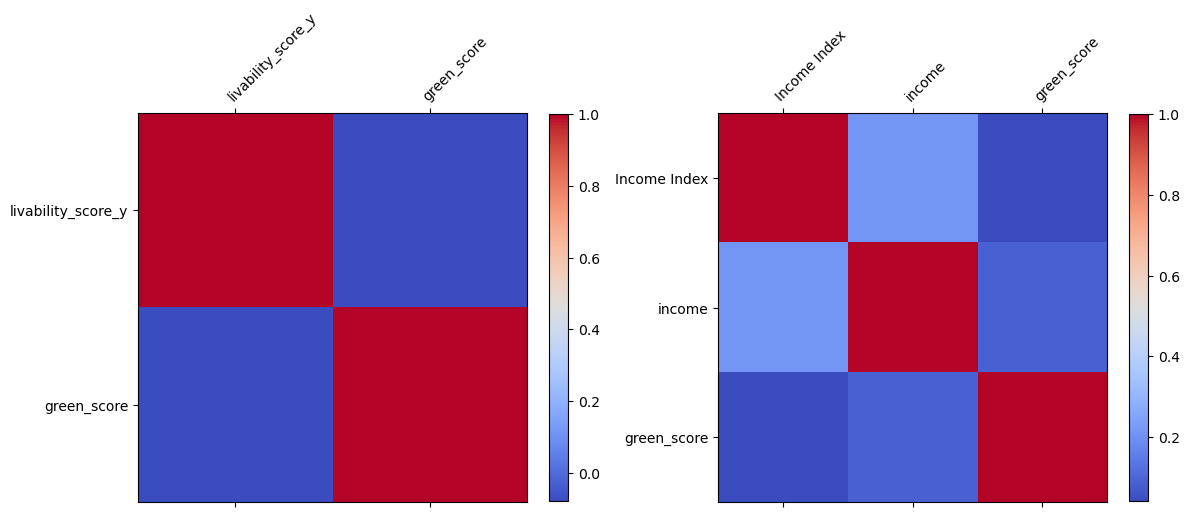

In [100]:
corr_heatmaps(df_houses,df_income)

In [101]:
df_numerical_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330522 entries, 0 to 5169347
Data columns (total 27 columns):
 #   Column                                                                                              Dtype  
---  ------                                                                                              -----  
 0   Registered nuisance (number)                                                                        int64  
 1   green_score                                                                                         float64
 2   livability_score_x                                                                                  float64
 3   TotalHouses                                                                                         int64  
 4   Population                                                                                          int64  
 5   income                                                                                     

In [102]:
def splitting_data(df,column):
    X = df.drop(column, axis=1).values
    Y = df[column].values
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    return X_train, X_test, y_train, y_test

In [103]:
def linear_regg(df,column):
    X_train, X_test, y_train, y_test = splitting_data(df,column)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    model = LinearRegression() 
    model.fit(X_train,y_train) 
    training_data_prediction = model.predict(X_train) 
    train_error_score = metrics.r2_score(y_train, training_data_prediction) 
    print("R squared Error - Training : ", train_error_score) 
    y_pred = model.predict(X_test) 
    test_error_score = metrics.r2_score(y_test, y_pred) 

    return y_pred, test_error_score

In [104]:
linear_regg(df_numeric_values,'green_score')

(1864417, 26) (1864417,) (466105, 26) (466105,)
R squared Error - Training :  0.2048294444227471


(array([14.96370485, 16.80497521, 19.76925903, ..., 19.11051708,
        27.20361584, 22.9028063 ]),
 0.20408507423642253)

In [108]:
def compare_regression_models(df, target_col):
    
    X_train, X_test, y_train, y_test = splitting_data(df, target_col)
    
    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_reg_pred = linear_reg.predict(X_test)
    linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
    linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
    linear_reg_r2 = r2_score(y_test, linear_reg_pred)

    # Random Forest Regression
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train, y_train)
    rf_reg_pred = rf_reg.predict(X_test)
    rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
    rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
    rf_reg_r2 = r2_score(y_test, rf_reg_pred)

    # Print and return the results
    print("Linear Regression MSE:", linear_reg_mse)
    print("Linear Regression MAE:", linear_reg_mae)
    print("Linear Regression R^2:", linear_reg_r2)
    print('----------------------------')
    print("Random Forest Regression MSE:", rf_reg_mse)
    print("Random Forest Regression MAE:", rf_reg_mae)
    print("Random Forest Regression R^2:", rf_reg_r2)

    return linear_reg_r2, rf_reg_r2


In [110]:
compare_regression_models(df_numeric_values,'green_score')

Linear Regression MSE: 89.00869171647068
Linear Regression MAE: 7.663246968979277
Linear Regression R^2: 0.20408507423642253
----------------------------
Random Forest Regression MSE: 29.415995173239818
Random Forest Regression MAE: 4.048713308972641
Random Forest Regression R^2: 0.7369624340828446


(0.20408507423642253, 0.7369624340828446)

In [112]:
def knn_regression(df, target_col, k):

    X_train, X_test, y_train, y_test = splitting_data(df, target_col)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    knn_reg_pred = knn.predict(X_test)
    knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)
    knn_reg_mae = mean_absolute_error(y_test,knn_reg_pred )
    knn_reg_r2 = r2_score(y_test, knn_reg_pred)

    print("K Neighbors Regression MSE:", knn_reg_mse)
    print("K Neighbors Regression MAE:", knn_reg_mae)
    print("K Neighbors Regression R^2:", knn_reg_r2)
    return knn_reg_r2